(240, 640)


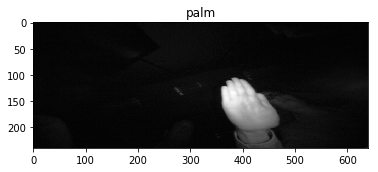

(240, 640)


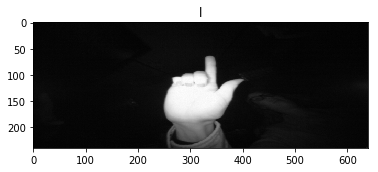

(240, 640)


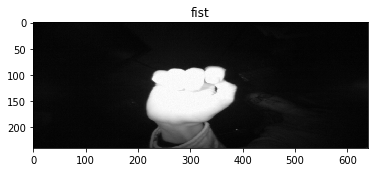

(240, 640)


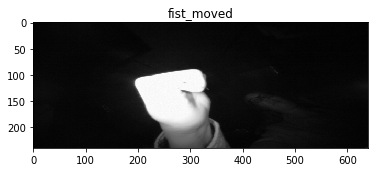

(240, 640)


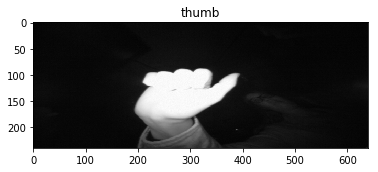

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, cv2

dir = 'C:/Users/a_m_9/OneDrive/Documents/Machine Learning/Capstone/leapGestRecog/Training Set'
Gestures = ['palm', 'l', 'fist', 'fist_moved', 'thumb', 'index', 'ok', 'palm_moved', 'c', 'down']

# Visualizing the input

for Gesture in Gestures[:5]:
    path = os.path.join(dir, Gesture)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        print(img_array.shape)
        plt.imshow(img_array, cmap = 'gray')
        plt.title(Gesture)
        plt.show()
        break

(240, 640)


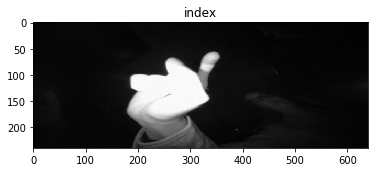

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, cv2

dir = 'C:/Users/a_m_9/OneDrive/Documents/Machine Learning/Capstone/leapGestRecog/Training Set'
Gestures = ['palm', 'l', 'fist', 'fist_moved', 'thumb', 'index', 'ok', 'palm_moved', 'c', 'down']

for Gesture in Gestures[5:]:
    path = os.path.join(dir, Gesture)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        print(img_array.shape)
        plt.imshow(img_array, cmap = 'gray')
        plt.title(Gesture)
        plt.show()
        break
    break

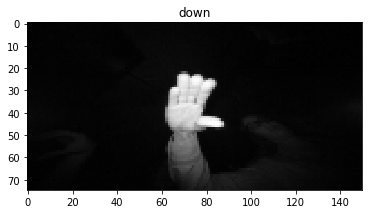

In [15]:
# Observing the effect of lowering the resolution on the image quality

new_array = cv2.resize(img_array, (150, 75))
plt.imshow(new_array, cmap = 'gray')
plt.title(Gestures[9])
plt.show()

In [3]:
print(new_array.shape)

(75, 150)


In [4]:
# Creating the training data

training_data = []

def create_training_data():
    for Gesture in Gestures:
        path = os.path.join(dir, Gesture)
        class_num = Gestures.index(Gesture)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (150, 75))
                training_data.append([new_array, class_num])
                

            except Exception as e:
                pass

create_training_data()

In [5]:
print("There are %d total images in the training set" % len(training_data))

There are 18000 total images in the training set


In [6]:
import random

random.shuffle(training_data) # Shuffle the training set

In [7]:
train_data = []
train_labels = []

for features, label in training_data: # load the features and labels into the variables that will be used as inputs to the CNN
    train_data.append(features)
    train_labels.append(label)

train_data = np.array(train_data).reshape(-1, 150, 75, 1)

In [8]:
import pickle # We're going to save the data we have so far to save time when tweaking the CNN later

pickle_out = open("X.pickle", "wb")
pickle.dump(train_data, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(train_labels, pickle_out)
pickle_out.close()

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D

train_data = pickle.load(open("X.pickle","rb"))
train_labels = pickle.load(open("y.pickle","rb"))

In [10]:
# First, we normalize the data

train_data = train_data/255.0

In [11]:
model = Sequential()
model.add(Conv2D(64, kernel_size = 3, input_shape = train_data.shape[1:], activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(32, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(16, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(GlobalAveragePooling2D())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 73, 64)       640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 36, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 34, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 17, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 15, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 7, 16)         0         
_________________________________________________________________
glob

In [12]:
from keras.callbacks import ModelCheckpoint     

history = model.fit(train_data, train_labels, epochs = 20, batch_size =32, validation_split = 0.1, verbose=1)

Train on 16200 samples, validate on 1800 samples
Instructions for updating:
Use tf.cast instead.


Using TensorFlow backend.


Epoch 1/20
16200/16200 [==============================] - 149s 9ms/sample - loss: 2.0237 - acc: 0.2551 - val_loss: 1.5000 - val_acc: 0.4411
Epoch 2/20
16200/16200 [==============================] - 148s 9ms/sample - loss: 1.2297 - acc: 0.5833 - val_loss: 0.9463 - val_acc: 0.6772
Epoch 3/20
16200/16200 [==============================] - 148s 9ms/sample - loss: 0.7722 - acc: 0.7430 - val_loss: 0.6733 - val_acc: 0.7639
Epoch 4/20
16200/16200 [==============================] - 148s 9ms/sample - loss: 0.4986 - acc: 0.8398 - val_loss: 0.3501 - val_acc: 0.9039
Epoch 5/20
16200/16200 [==============================] - 148s 9ms/sample - loss: 0.3308 - acc: 0.8983 - val_loss: 0.2424 - val_acc: 0.9294
Epoch 6/20
16200/16200 [==============================] - 148s 9ms/sample - loss: 0.2499 - acc: 0.9264 - val_loss: 0.2180 - val_acc: 0.9378
Epoch 7/20
16200/16200 [==============================] - 148s 9ms/sample - loss: 0.1982 - acc: 0.9416 - val_loss: 0.1595 - val_acc: 0.9539
Epoch 8/20
16200/162

In [24]:
# We create our testing set which is basically the unused 10% of the original dataset

test_dir = 'C:/Users/a_m_9/OneDrive/Documents/Machine Learning/Capstone/leapGestRecog/Testing Set'

testing_data = []

def create_testing_data():
    for Gesture in Gestures:
        path = os.path.join(test_dir, Gesture)
        class_num = Gestures.index(Gesture)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (150, 75))
                testing_data.append([new_array, class_num])
                

            except Exception as e:
                pass

create_testing_data()

In [25]:
import random

random.shuffle(testing_data) # Shuffle the testing set

In [26]:
test_data = []
test_labels = []

for features, label in testing_data: # load the features and labels into the variables that will be used as inputs to the CNN
    test_data.append(features)
    test_labels.append(label)

test_data = np.array(test_data).reshape(-1, 150, 75, 1)

In [27]:
pickle_out = open("test_data.pickle", "wb")
pickle.dump(test_data, pickle_out)
pickle_out.close()

pickle_out = open("test_labels.pickle", "wb")
pickle.dump(test_labels, pickle_out)
pickle_out.close()

In [28]:
test_data = pickle.load(open("test_data.pickle","rb"))
test_labels = pickle.load(open("test_labels.pickle","rb"))

In [29]:
test_data = test_data/255.0

In [30]:
# Evaluating the model's accuracy using the testing set

(test_loss, test_accuracy) = model.evaluate(  
    test_data, test_labels, batch_size = 16, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(test_accuracy * 100))  
print("[INFO] Loss: {}".format(test_loss))

2000/2000 [==============================] - 8s 4ms/sample - loss: 1.9913 - acc: 0.7290
[INFO] accuracy: 72.90%
[INFO] Loss: 1.9913177816867829
